<a href="https://colab.research.google.com/github/Natalia409634/Grupo7-practica1-ML/blob/main/Copy_of_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Felipe Camacho: PON AQUÍ TU NIA
*   Natalia Jiménez Barrigüete: 100409634
*   Universidad Carlos III de Madrid



# **PRÁCTICA 1 APRENDIZAJE AUTOMÁTICO: PREDICCIÓN DE LA ENERGÍA SOLAR**


*   Grupo 7

# Análisis Exploratorio de datos 



1.   Comprender la anturaleza de los datos
2.   Identificar y tratar los datos faltantes
3.   Analizar la distribución de las variables
4.   Identificar valores atípicos
5.   Analizar la relación entre las variables
6.   Identificar patrones y tendencias
7.   Visualizar los resultados

## Importación de librerías

In [18]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
# Instalar statsmodels para intervalos de confianza 
!pip install statsmodels

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Lectura de datos


## Observación de las dimensiones del conjunto de datos

In [42]:
disp_df.shape

(4380, 76)

Nuestro conjunto de datos tiene 4380 instancias y 76 variables (15var x 5día + var de salida)

In [20]:
disp_df, comp_df = [pd.read_csv(f, compression="bz2", index_col=0) for f in 
                    ["/content/drive/MyDrive/Aprendizaje Automático/datos practica/disp_st7ns1.txt.bz2",
                     "/content/drive/MyDrive/Aprendizaje Automático/datos practica/comp_st7ns1.txt.bz2"]]

El método info() nos da información sobre las 46 columnas

In [6]:
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

In [7]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, V4381 to V5113
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  733 non-null    float64
 1   apcp_sf2_1  733 non-null    float64
 2   apcp_sf3_1  733 non-null    float64
 3   apcp_sf4_1  733 non-null    float64
 4   apcp_sf5_1  733 non-null    float64
 5   dlwrf_s1_1  733 non-null    float64
 6   dlwrf_s2_1  733 non-null    float64
 7   dlwrf_s3_1  733 non-null    float64
 8   dlwrf_s4_1  733 non-null    float64
 9   dlwrf_s5_1  733 non-null    float64
 10  dswrf_s1_1  733 non-null    float64
 11  dswrf_s2_1  733 non-null    float64
 12  dswrf_s3_1  733 non-null    float64
 13  dswrf_s4_1  733 non-null    float64
 14  dswrf_s5_1  733 non-null    float64
 15  pres_ms1_1  733 non-null    float64
 16  pres_ms2_1  733 non-null    float64
 17  pres_ms3_1  733 non-null    float64
 18  pres_ms4_1  733 non-null    float64
 19  pres_ms5_1  733 non-null    

## Limpieza de datos
 Los datos pueden contener errores, datos faltantes, duplicados, entre otros problemas. Por lo tanto, necesitamos limpiarlos antes de entrenar el modelo.

In [59]:
disp_df.dropna()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.0,0.000000,0.000000,0.000000,250.765400,244.423459,250.810849,269.559490,268.286532,...,247.777202,250.487543,264.160586,260.795116,0,8.000000,49.636364,113.818182,79.181818,11487900
V2,0.000000,0.0,0.000000,0.009091,0.010909,267.362233,250.278670,274.982095,293.350833,281.656355,...,238.549172,233.845458,251.197511,252.962007,0,7.090909,33.000000,93.454545,66.272727,9235200
V3,0.000000,0.0,0.000000,0.000000,0.000000,222.643638,217.905113,224.133093,251.074578,253.476495,...,233.556009,239.208023,257.450057,253.893104,0,8.000000,51.000000,116.090909,80.727273,11895900
V4,0.000909,0.0,0.000000,0.000000,0.000000,269.499409,224.078362,225.675403,237.365465,238.349503,...,244.280412,246.125845,256.927582,252.958314,0,8.000000,51.272727,119.000000,83.636364,12186600
V5,0.000000,0.0,0.000000,0.000000,0.000000,241.344566,244.017960,252.214458,295.031791,304.845553,...,237.979387,243.498259,243.310007,222.655228,0,7.909091,49.454545,106.363636,68.545455,6411300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.000909,0.0,0.000909,0.000000,0.000000,268.168651,261.124151,266.273302,281.954662,277.734320,...,249.984808,252.052567,260.826037,260.334861,0,8.454545,49.181818,109.181818,75.363636,11660100
V4377,0.000000,0.0,0.000000,0.000000,0.000000,254.187456,256.191119,263.439742,287.966780,288.432201,...,242.674612,248.607801,269.338423,266.205636,0,8.000000,49.181818,110.727273,76.181818,11555400
V4378,0.000000,0.0,0.000000,0.000000,0.000000,270.627982,265.384824,268.626864,284.752031,284.260479,...,244.978506,256.735739,288.550856,287.388403,0,8.363636,51.090909,116.727273,80.818182,11949900
V4379,0.000000,0.0,0.000000,0.000000,0.000909,268.680231,262.617518,266.925831,290.610293,293.442266,...,257.979990,264.526767,279.741230,265.984283,0,8.454545,51.818182,114.000000,77.000000,11738400


In [60]:
disp_df.drop_duplicates()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.0,0.000000,0.000000,0.000000,250.765400,244.423459,250.810849,269.559490,268.286532,...,247.777202,250.487543,264.160586,260.795116,0,8.000000,49.636364,113.818182,79.181818,11487900
V2,0.000000,0.0,0.000000,0.009091,0.010909,267.362233,250.278670,274.982095,293.350833,281.656355,...,238.549172,233.845458,251.197511,252.962007,0,7.090909,33.000000,93.454545,66.272727,9235200
V3,0.000000,0.0,0.000000,0.000000,0.000000,222.643638,217.905113,224.133093,251.074578,253.476495,...,233.556009,239.208023,257.450057,253.893104,0,8.000000,51.000000,116.090909,80.727273,11895900
V4,0.000909,0.0,0.000000,0.000000,0.000000,269.499409,224.078362,225.675403,237.365465,238.349503,...,244.280412,246.125845,256.927582,252.958314,0,8.000000,51.272727,119.000000,83.636364,12186600
V5,0.000000,0.0,0.000000,0.000000,0.000000,241.344566,244.017960,252.214458,295.031791,304.845553,...,237.979387,243.498259,243.310007,222.655228,0,7.909091,49.454545,106.363636,68.545455,6411300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.000909,0.0,0.000909,0.000000,0.000000,268.168651,261.124151,266.273302,281.954662,277.734320,...,249.984808,252.052567,260.826037,260.334861,0,8.454545,49.181818,109.181818,75.363636,11660100
V4377,0.000000,0.0,0.000000,0.000000,0.000000,254.187456,256.191119,263.439742,287.966780,288.432201,...,242.674612,248.607801,269.338423,266.205636,0,8.000000,49.181818,110.727273,76.181818,11555400
V4378,0.000000,0.0,0.000000,0.000000,0.000000,270.627982,265.384824,268.626864,284.752031,284.260479,...,244.978506,256.735739,288.550856,287.388403,0,8.363636,51.090909,116.727273,80.818182,11949900
V4379,0.000000,0.0,0.000000,0.000000,0.000909,268.680231,262.617518,266.925831,290.610293,293.442266,...,257.979990,264.526767,279.741230,265.984283,0,8.454545,51.818182,114.000000,77.000000,11738400


## Para mejorar el diseño de las tablas:

In [61]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'darkblue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

## Exploración de datos (fichero disponible)

**Hay que notar que el display te hace un "resumen". los datos completo están más abajo

In [62]:

cols = disp_df.columns.to_list()
print(len(cols))


display(set_frame_style(disp_df[cols].head(),'Primeros 12 años de datos'))

display(set_frame_style(disp_df[cols].describe(),'Resumen de estadistica'))

display(set_frame_style(disp_df[cols].isna().any().to_frame().transpose(), 'Columnas con valor nulo'))

display(set_frame_style(disp_df[cols].nunique().to_frame().rename({0:'Numero de valores únicos'}, axis=1).transpose(), 'Valores únicos en cada variable'))




76


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,250.765400,244.423459,250.810849,269.559490,268.286532,0.000000,30.000000,210.000000,520.000000,343.636364,102055.502841,102235.750000,102209.884943,101936.835938,101872.831676,6.524647,7.627273,8.506254,8.518182,8.627869,0.002534,0.003172,0.003446,0.003233,0.003170,0.000000,0.000000,0.000000,0.000909,0.005455,0.000173,0.000391,0.000227,0.002045,0.006618,281.598877,279.245625,286.155038,288.036230,288.040364,278.911660,277.766252,277.766541,286.278778,278.864233,278.958341,279.230388,286.160964,288.041959,278.911774,277.196558,278.895835,290.008584,290.514271,276.100081,342.485868,332.977009,354.717035,407.410417,388.826680,251.425894,247.777202,250.487543,264.160586,260.795116,0,8.000000,49.636364,113.818182,79.181818,11487900
V2,0.000000,0.000000,0.000000,0.009091,0.010909,267.362233,250.278670,274.982095,293.350833,281.656355,0.000000,30.000000,154.545455,448.181818,302.727273,101200.924006,101263.825284,101303.865057,101343.617898,101781.818892,11.179793,10.496407,9.850264,11.740862,6.224275,0.002993,0.002793,0.003277,0.003982,0.002809,0.018182,0.055455,0.070000,0.034545,0.000000,0.019845,0.055391,0.069945,0.033227,0.001164,279.967773,278.845195,287.473133,287.788499,287.779763,278.197102,274.618808,274.618808,286.177912,282.564714,278.209894,278.834023,287.431874,286.187456,282.563196,277.039099,278.533098,288.739879,287.325476,280.805253,338.159915,324.536491,348.706637,395.381403,383.137440,213.200327,238.549172,233.845458,251.197511,252.962007,0,7.090909,33.000000,93.454545,66.272727,9235200
V3,0.000000,0.000000,0.000000,0.000000,0.000000,222.643638,217.905113,224.133093,251.074578,253.476495,0.000000,30.000000,210.000000,530.000000,350.000000,102436.621449,102390.004972,102036.716619,101495.490057,101383.874290,4.926770,5.140347,6.463636,8.581818,10.200000,0.002536,0.002530,0.002755,0.002943,0.002873,0.000000,0.000000,0.000000,0.001818,0.000000,0.001064,0.000845,0.000664,0.001273,0.001045,276.170088,273.269786,279.622151,283.766785,283.871654,272.399667,271.494093,271.493708,279.780884,279.668329,272.411421,273.273368,279.601729,283.734602,279.937666,271.369418,273.809176,286.896357,286.522816,277.506414,315.458027,306.933780,330.523490,387.520954,374.042120,241.110199,233.556009,239.208023,257.450057,253.893104,0,8.000000,51.000000,116.090909,80.727273,11895900
V4,0.000909,0.000000,0.000000,0.000000,0.000000,269.499409,224.078362,225.675403,237.365465,238.349503,0.000000,30.000000,212.727273,540.000000,359.909091,102460.892756,102716.302557,102816.484375,102560.992188,102516.028409,4.753541,4.596232,4.717448,5.322722,7.302747,0.002525,0.002528,0.002475,0.002573,0.002593,0.000000,0.000000,0.000000,0.000909,0.003636,0.000209,0.000491,0.000436,0.001200,0.005182,281.977866,276.849648,279.332264,281.541279,281.535670,276.948212,275.059146,275.065982,279.461171,274.049336,276.976060,275.472984,279.350478,281.544278,274.126462,275.697496,275.648252,283.773235,285.244407,272.009929,343.129153,323.216109,336.032751,375.752333,361.527410,233.603051,244.280412,246.125845,256.927582,252.958314,0,8.000000,51.272727,119.000000,83.636364,12186600
V5,0.000000,0.000000,

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,0.440881,0.208098,0.394272,0.201120,0.396356,312.142948,312.121639,320.155393,341.917393,341.475232,0.029120,152.527750,371.834475,712.816023,537.070071,101690.646934,101737.540090,101679.547992,101444.573588,101400.198148,19.842797,19.807822,20.212242,20.658716,20.805452,0.007246,0.007793,0.008040,0.007975,0.008229,0.059969,0.059361,0.054407,0.053733,0.051744,0.060320,0.059686,0.054755,0.054110,0.052146,287.349707,288.516510,293.640515,295.810162,295.902611,284.727563,284.681609,284.667909,293.635035,292.217775,284.936580,288.451720,293.588540,295.667318,292.614234,284.024871,289.996252,297.764336,298.435729,291.675091,376.853798,383.298421,406.443235,455.079645,445.601128,248.822217,248.636010,254.000895,267.052077,265.909351,0.000228,38.455085,79.869863,138.447385,110.226359,17314615.890411
std,1.710421,0.896372,1.620747,0.841560,1.574846,55.168805,57.168335,58.668262,62.360820,62.260298,0.156030,106.428080,153.390090,217.972619,190.169729,758.746049,764.494591,752.395899,736.320249,760.339918,11.378550,11.392199,11.445437,11.495329,11.616122,0.004182,0.004374,0.004226,0.003987,0.004104,0.148323,0.148715,0.144220,0.143098,0.145207,0.148195,0.148572,0.144113,0.142997,0.145078,9.556534,10.194704,10.398525,10.406421,10.392852,9.256939,9.343150,9.344682,10.450860,11.000208,9.178237,10.248218,10.436657,10.421773,11.072713,9.358560,10.903260,10.812613,10.818785,11.634290,49.747196,54.375237,57.838709,64.961622,64.669199,35.232240,35.757661,35.915680,39.676771,38.943608,0.015110,26.374458,30.920307,38.923648,35.395258,7957545.637138
min,0.000000,0.000000,0.000000,0.000000,0.000000,167.959154,162.143445,169.076827,187.214616,186.252052,0.000000,0.000000,20.000000,35.454545,21.818182,99164.946023,98847.185369,98754.556818,98516.754261,98602.835938,1.554545,1.760273,1.343715,1.279167,1.373974,0.000445,0.000437,0.000437,0.000526,0.000531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,256.535583,255.891054,259.971599,262.853210,262.851560,250.438633,250.787951,250.788531,260.108332,258.075894,250.726612,255.898045,259.962641,262.859073,258.070962,248.337158,257.706260,264.184229,265.343584,255.880352,224.114342,227.349122,251.314349,281.468367,275.763675,102.943994,115.35

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
Numero de valores únicos,1302,1113,1249,922,1089,4379,4378,4379,4378,4378,14,589,2401,882,3024,4376,4380,4373,4377,4379,4351,4340,4287,4301,4326,4351,4340,4344,4347,4323,1128,1118,1061,1063,1043,3854,3833,3729,3956,3950,4379,4379,4380,4379,4380,4380,4380,4380,4380,4380,4379,4380,4379,4379,4379,4380,4380,4379,4380,4380,4380,4379,4380,4380,4380,4379,4380,4380,4380,4380,2,929,1207,1329,1330,4262


# Conclusiones:


*   Las variables "apcp_sf1" son poco relevantes -> Todo 0
*   No hay ningún valor nulo preocupante
*  Valores que se repiten muy poco: dswrf_s1_1, uswrf_s1_1
*   Medias y medianas de las variables que se repiten poco: no hay gran diferencia, por lo que los outliers no deben ser muy extremos





## Estudio de correlación

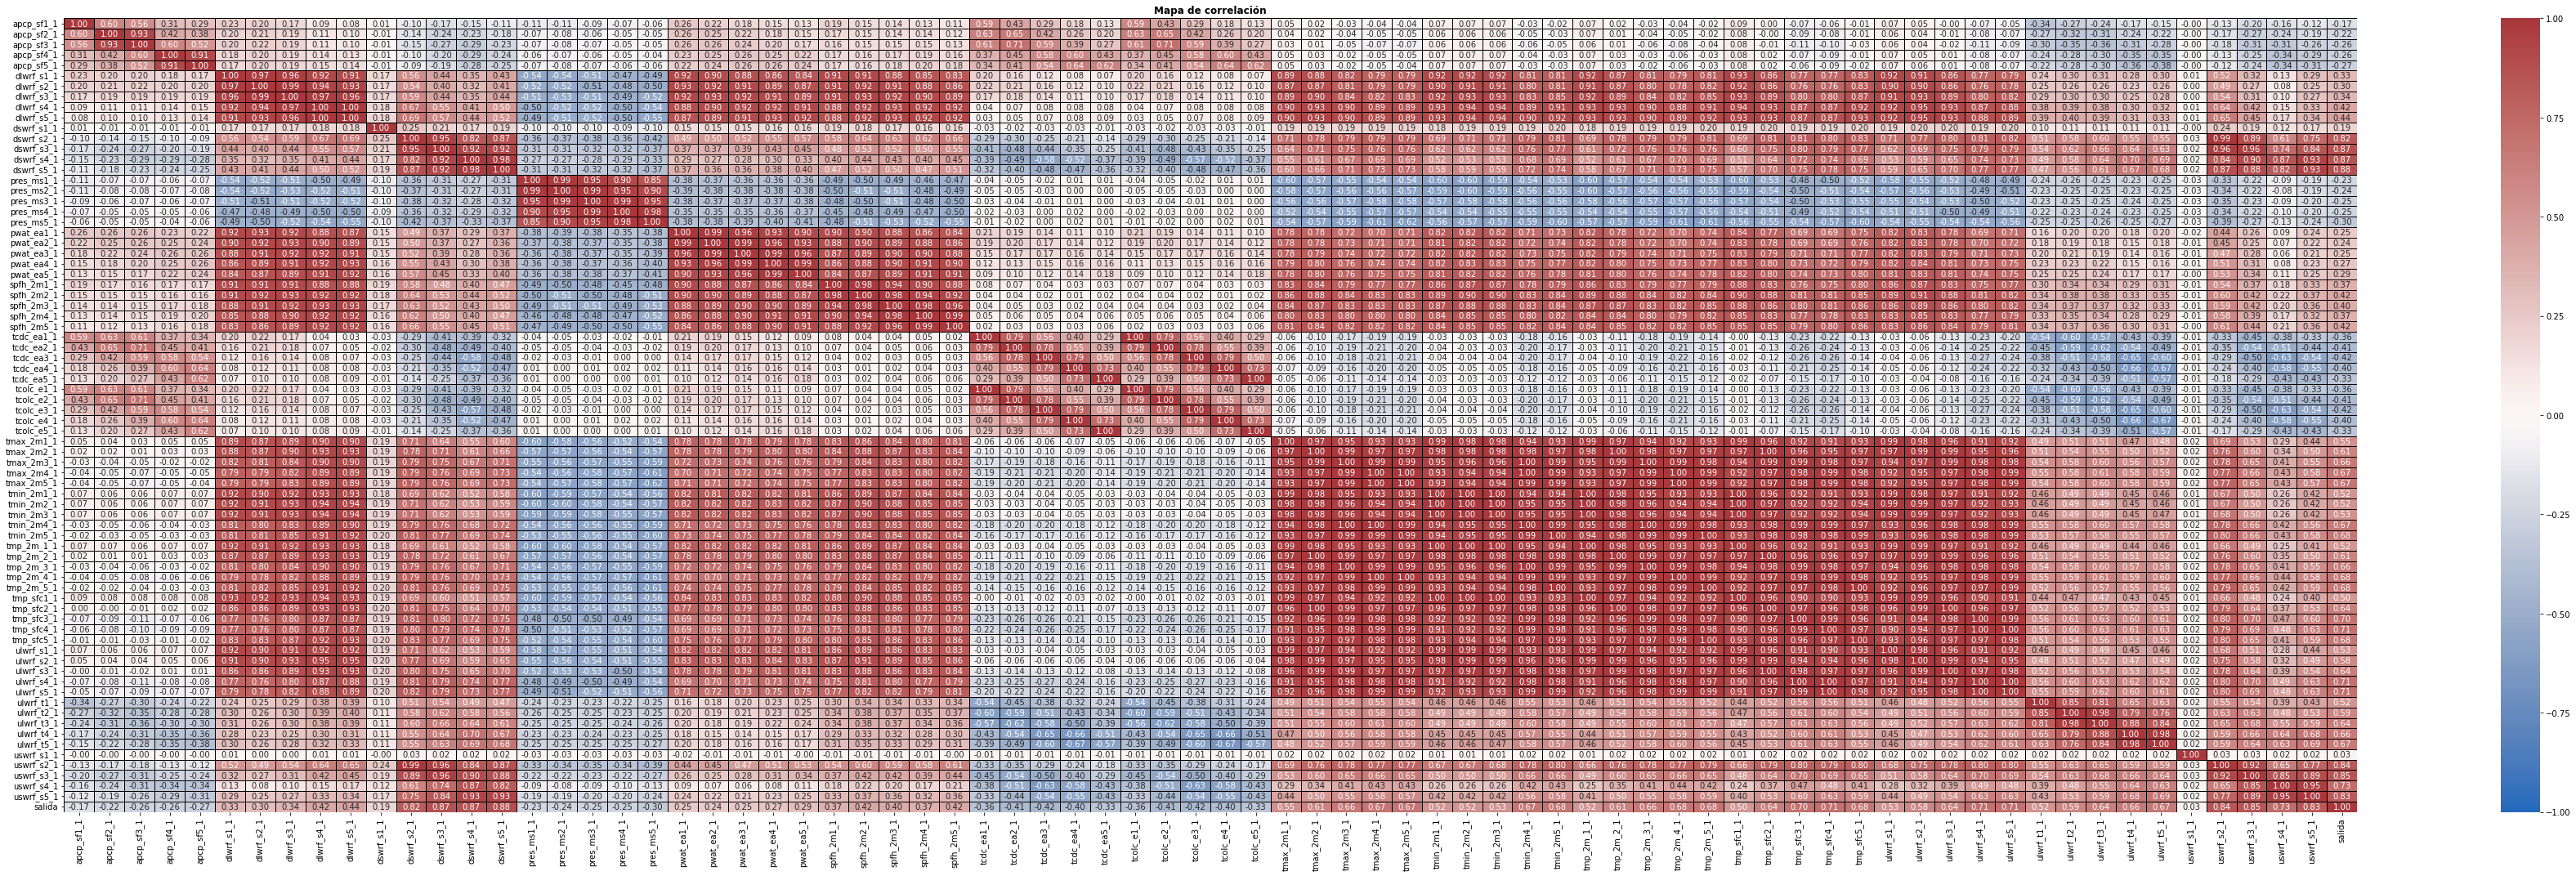

In [63]:
plt.figure(figsize=(50,15))

ax = sns.heatmap(disp_df.loc[:, disp_df.columns != 'id'].corr(), linecolor='black', linewidth='0.6', cmap="vlag", annot=True, fmt=".2f", vmin=-1, vmax=1)
ax.set_title('Mapa de correlación', weight='bold')

plt.tight_layout()
plt.show()


## Interpretación del mapa de correlación:


*   Alta correlacion entre la temperatura (máxima y mínima) y el flujo radiativo de onda larga en la superficie

*   uswrf_s1_1 (flujo radiativo de onda corta hacia arriba en la superficie) no está correlacionada con ninguna variable



# 4. Dividir los datos en train (los 10 primeros años) y test (los dos últimos)

Para comenzar, dividimos los datos en dos conjuntos: train y test.

Antes de entrenar el modelo, es necesario preparar los datos

El método head() nos da información sobre los datos de los 10 primeros años

In [54]:
trainData = disp_df.head(3650)

In [79]:
trainData.head(3650)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,250.765400,244.423459,250.810849,269.559490,268.286532,...,247.777202,250.487543,264.160586,260.795116,0,8.000000,49.636364,113.818182,79.181818,11487900
V2,0.000000,0.000000,0.000000,0.009091,0.010909,267.362233,250.278670,274.982095,293.350833,281.656355,...,238.549172,233.845458,251.197511,252.962007,0,7.090909,33.000000,93.454545,66.272727,9235200
V3,0.000000,0.000000,0.000000,0.000000,0.000000,222.643638,217.905113,224.133093,251.074578,253.476495,...,233.556009,239.208023,257.450057,253.893104,0,8.000000,51.000000,116.090909,80.727273,11895900
V4,0.000909,0.000000,0.000000,0.000000,0.000000,269.499409,224.078362,225.675403,237.365465,238.349503,...,244.280412,246.125845,256.927582,252.958314,0,8.000000,51.272727,119.000000,83.636364,12186600
V5,0.000000,0.000000,0.000000,0.000000,0.000000,241.344566,244.017960,252.214458,295.031791,304.845553,...,237.979387,243.498259,243.310007,222.655228,0,7.909091,49.454545,106.363636,68.545455,6411300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V3646,0.000000,0.000000,0.000000,0.000000,0.000000,255.160595,240.446819,247.922736,273.079579,273.612430,...,237.941258,244.726549,263.041077,261.825745,0,8.727273,50.636364,112.727273,77.181818,11653200
V3647,0.077273,0.130909,0.144545,0.000000,0.000000,283.581948,337.515275,322.540552,296.886846,295.015633,...,218.996947,221.980344,263.529796,269.462427,0,1.909091,32.727273,106.727273,74.363636,10267200
V3648,0.123636,0.000000,0.000000,0.000000,0.000000,318.710183,275.076832,274.401958,276.128091,269.126063,...,261.021440,263.102004,276.634189,273.931355,0,7.818182,49.909091,114.636364,80.000000,11205600
V3649,0.000000,0.000000,0.000000,0.000000,0.000000,227.251068,220.230413,224.335312,245.309282,240.838335,...,239.666641,244.022236,251.510648,251.981757,0,8.909091,53.181818,115.181818,79.727273,11304000


In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = trainData.drop(['salida'], axis=1) #La salida no debe estar incluida en el modelo no?
y = trainData['salida'] #Queremos predecir la salida

#  normalizan los datos en la matriz de características
scaler = MinMaxScaler() 
x = scaler.fit_transform(x)

# ivide los datos normalizados en conjuntos de entrenamiento y prueba
#la semilla es el num de nuestro grupo de prácticas: 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

## A continuación, creamos un objeto de regresión lineal y entrenamos el modelo con los conjuntos de entrenamiento x_train e y_train.

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

## Evaluación del modelo utilizando el modelo de regresión lineal

In [86]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


y_predict = model.predict(x_test)

cols = trainData.drop(['salida'], axis=1).columns.to_list()

# 
# 
df_coeff = pd.DataFrame(data={'Feature': cols, 'Coeff': model.coef_}).sort_values(by='Coeff', ascending=False)

print("R Square: %.3f" % r2_score(y_test, y_predict))
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_predict))
print("RMSE: %.3f" % mean_squared_error(y_test, y_predict, squared=False))
print("RMSEL: %.3f" % mean_squared_log_error(y_test, y_predict, squared=False))

R Square: 0.851
Mean squared error: 9502924839012.838
RMSE: 3082681.437
RMSEL: 0.300



*   **R cuadrado**: una medida de cuánto se ajustan los datos al modelo. Varía entre 0 y 1, donde 1 significa que el modelo explica perfectamente la varianza de los datos. Por lo tanto, el modelo es mejorable pero es significativo

   **Error cuadrático medio** : una medida de la diferencia cuadrática media entre los valores reales y los valores predichos. Un valor más bajo indica un mejor rendimiento.

*   **Raíz cuadrada del error cuadrático medio**: una medida de la diferencia media entre los valores reales y los valores predichos. Un valor más bajo indica un mejor rendimiento.

*   **Logaritmo del error cuadrático medio**: una medida del error relativo entre los valores reales y los valores predichos. Un valor más bajo indica un mejor rendimiento.

En conclusión, el modelo no está del todo mal pero es posible conseguir otro que se ajuste mucho más a los datos



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Árboles de decisión

In [90]:
from sklearn import tree
# Aquí definimos el tipo de método de entrenamiento (todavía no pasa nada)
clf = tree.DecisionTreeClassifier()
# Ahora, entrenamos (*fit*) el método en el conjunto de datos (X,y)
clf.fit(x_train,y_train)
# clf **ha sido modificado** y ahora contiene el modelo entrenado

DecisionTreeClassifier()

### Visualización del árbol como texto

In [94]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_14 <= 0.41
|   |--- feature_31 <= 0.01
|   |   |--- feature_1 <= 0.00
|   |   |   |--- feature_35 <= 0.00
|   |   |   |   |--- feature_58 <= 0.40
|   |   |   |   |   |--- feature_36 <= 0.00
|   |   |   |   |   |   |--- feature_55 <= 0.39
|   |   |   |   |   |   |   |--- class: 12369900
|   |   |   |   |   |   |--- feature_55 >  0.39
|   |   |   |   |   |   |   |--- feature_67 <= 0.66
|   |   |   |   |   |   |   |   |--- class: 12397500
|   |   |   |   |   |   |   |--- feature_67 >  0.66
|   |   |   |   |   |   |   |   |--- class: 12271500
|   |   |   |   |   |--- feature_36 >  0.00
|   |   |   |   |   |   |--- class: 11010048
|   |   |   |   |--- feature_58 >  0.40
|   |   |   |   |   |--- feature_52 <= 0.45
|   |   |   |   |   |   |--- class: 12425100
|   |   |   |   |   |--- feature_52 >  0.45
|   |   |   |   |   |   |--- feature_43 <= 0.43
|   |   |   |   |   |   |   |--- class: 11723100
|   |   |   |   |   |   |--- feature_43 >  0.43
|   |   |   |   |   |   |   |--- fe

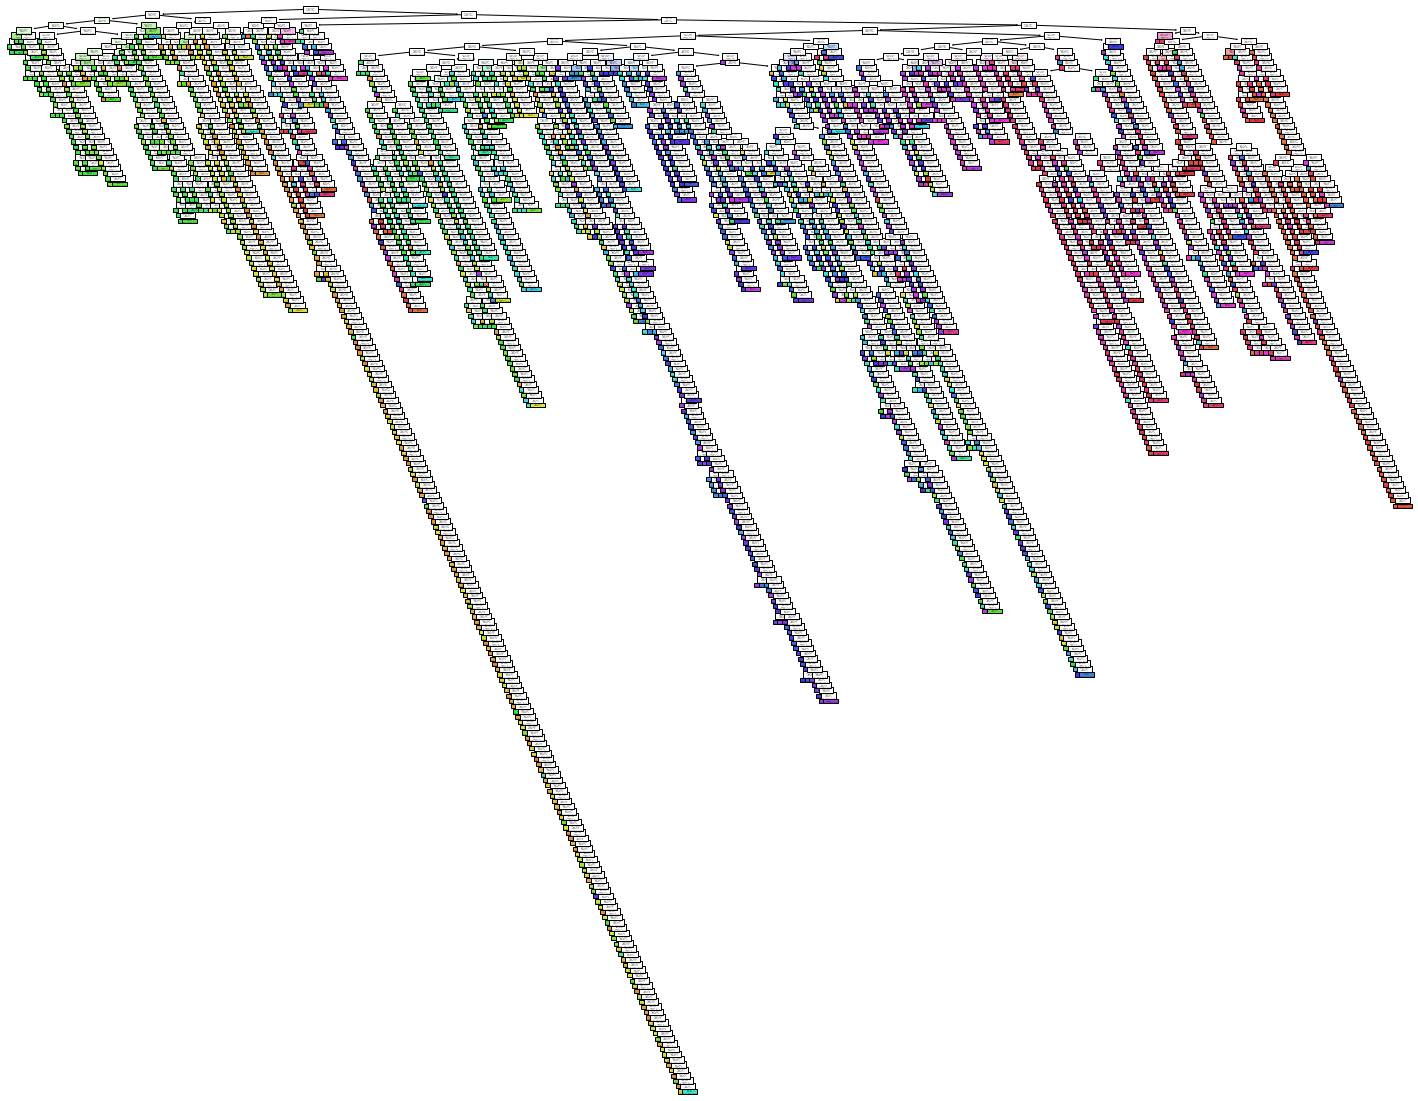

In [95]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   filled=True)

Hiperparámetros de los árboles de decisión. Ajuste de árboles de decisión

# 5.Métodos básicos

*   KNN
*   Árboles de regresión
*   Regresión lineal






## K-NN

# 6.Dimensionalidad del problema

# 7. Métodos avanzados: SVMs, Random Forests

# 8. Modelo final